# **Neural Network: Saving Jon Snow** by Jesus Resendiz

The following exercise was proposed in the ***Dot Csv*** channel, to understand a **Neural Network** with a hypothetical exercise, in which we must "Save Jon Snow".

*Context* >>> When we have many input variables, we require more neurons to process the information and know "x" result. As we add more neurons, decision making becomes more complex, which in turn, gives rise to **"Deep Learning"**. But ... since we connect multiple neurons sequentially, and since each neuron is a regression problem, what we will be looking for is to concatenate different linear regression operations. The problem is that when adding many **Linear Regression** operations, it is equivalent to only having done a single operation. To prevent the Network from collapsing, we need each line to undergo a ***NON-Linear*** manipulation that distorts them, and we achieve that with the **Activation Functions**.


## Targets



*   Call the Libraries that we are going to use
*   Create Dataset
*   Net Layer Class
*   Activation Functions
  1.   Sigmoid Function
  2.   Rule Function
*   Layer Creation
*   Cost Function
*   Forward Pass
*   Elemento de lista



## Libraries

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt 

from sklearn.datasets import make_circles

## Dataset

For which, we are going to make use of the ***Make circles Functio***n. First, we are going to define two variables n (number of records) p (characteristic of each record), for example: 500 people with two characteristics each (age and height).

In [ ]:
n = 500
p = 2
X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)
Y  = Y[:, np.newaxis]

The ***Factor*** tells us about the distance between the two circles and ***Noise*** is the noise or variability between our points. "**X**" points to our dataset, input variable and points that we visualize and the "**Y**" axis is a binary vector. We are going to directly visualize the content of the variables, if we use the information of "**Y**", with axis we visualize the axes with the same proportion.

With this we have a neural network that separates our point cloud into two classes.

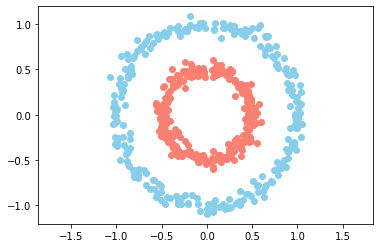

In [ ]:


plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c= "skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c= "salmon")
plt.axis("equal")
plt.show()

## NET LAYER CLASS

If we define in our Neural Network a Class - Object that refers to a **Layer**. With this we create the **"Class Initializer"** and define what parameters we will use to our class when we create it. This only as a structure with the **"Layer Parameters"** "**w**" and "**b**". We have to specify the number of connections that enter our layer and define how many neurons there are and, the last parameter the **Activation Function**.

"No logic, just parameters"

In [ ]:
class neural_layer():

  def __init__(self, n_conn, n_neur, act_f):

    self.act_f = act_f

    self.b = np.random.rand(1, n_neur)      * 2 - 1
    
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1

## ACTIVATION FUNCTIONS

Functions through which the weighted sums performed in the neuron will pass. And that is going to introduce within the ***network NO Linearities*** which allows us to combine many neurons, if not, this would become a single linear function.

### Sigmoid Function

When implementing the Sigmoid Function: We create a vector with 100 values ranging from -5 to 5, and we can take it to ***Graph the Sigmoid Function***.

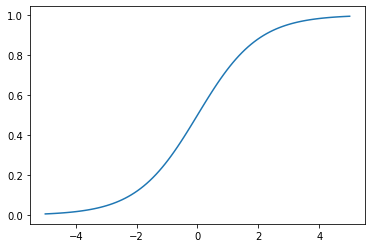

In [ ]:
sigm = (lambda x: 1 / (1 + np.e ** (-x)), 
        lambda x: x * (1 - x))

_x = np.linspace(-5, 5, 100)
_x
plt.plot(_x , sigm[0](_x))

Let us remember that the Neural Network is going to implement the ***BP Algorithm*** and within this one of the **Partial Derivatives** that we calculated was the ***Derivative of the Activation Function***. This means that at some point we will have to define what is the **Derivative of the Sigmoid Function**.

## Layer Creation

As we have already created our Class that allows us to ***Create Layers***, we can start with **L0** or **Layer Zero**, taking our layer type object, a valid way to create the Neural Network layer by layer.

In [ ]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
#... 

With neural_layer, we are invited to do this in an interactive and more comfortable way, if we define a Function that is responsible for creating our Neural Network, the last layer is only a neuron, our output neuron, and it will be a **Binary Result**. If we create a vector nn neural network that will contain all the layers of the Neural Network.

In [ ]:
def create_nn(topology, act_f):
  
  nn = []

  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn

When creating our Neural Network, we realize that it is working because we receive **a vector** that has ***6 hidden layers*** and they are objects of **Type Neural Layer**

In [ ]:
topology = [p, 4, 8, 16, 8, 4, 1]

create_nn(topology, sigm)

**¡We have already created the Data Structure that supports our entire Neural Network!**

But we have not implemented the logic to train our network.

We create the code that will allow us to Train our Neural Network. When we define the Train Function, it is in charge of Training the Neural Network. Training the Neural Network can be consiferated in 3 fundamental elements:


1.   **Forward**> ***Input - output***> where the NN processes forward through all layers with weighted sums and trigger functions. When it is **NOT Trained**, it will return a Random Value, but when **YES it is Trained** the value would resemble the value of the vector "Y". Once we have the result ...
2.   **We compare it with the vector "Y"**> and we compare our real value with the ***Cost Function***. When comparing it, an ***Error is generated*** and this error is used to make a ***Propagation backwards*** with the **Back Propagation Algorithm** and to be able to calculate the Partial Derivatives that are what allow us to obtain ...
3.   **The Descent of the Gradient**> Algorithm that will allow us to ***Optimize the Cost Function*** and will allow us to ***Train our network***.



##COST FUNCTION

We define the Cost Function: Using the ***Mean Square Error***.

In [ ]:
topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))


def train(neural_net, X, Y, l2_cost, lr=0.5):

  out = [(None, X)]

Neural Net

X, Y= Input Data and output Data

Cost Function
 
Learning Rate

## Forward Pass

We must collect our ***Input Vector*** and use it layer by layer, executing the operations that are in each of the neurons. Let us remember they are of **two types**: **Weighted Sum** and go through an **Activation Function**.
We use the l Index to traverse each of the layers of the NN.

In [ ]:
topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))


def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):

  out = [(None, X)]

# Forward Pass

  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z, a))


  if train:

#Back Propagation 
    deltas = []
    for l in reversed(range(0, len(neural_net))):
      
      z = out[l+1][0]
      a = out[l+1][1]


      if l == len(neural_net) -1:
        # DELTA FORMULA 0 - LAST LAYER
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))

        # NEXT LAYER - Calculate Delta Previous Layer
      else: 
        
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

      _W = neural_net[l].W

#Gradient Descent ---> (Traning)

      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr

      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr 

  return out[-1][1]



train(neural_net, X, Y, l2_cost, 0.5)
#print("")

array([[0.76354604],
       [0.76637296],
       [0.76929257],
       [0.76854466],
       [0.76910133],
       [0.76483822],
       [0.76182362],
       [0.76953739],
       [0.76557895],
       [0.76257706],
       [0.76396879],
       [0.76665609],
       [0.76324799],
       [0.76285495],
       [0.7603676 ],
       [0.76413584],
       [0.76532727],
       [0.76649166],
       [0.76645406],
       [0.7682022 ],
       [0.76554627],
       [0.76863231],
       [0.7685198 ],
       [0.76343043],
       [0.76792427],
       [0.76679546],
       [0.7654811 ],
       [0.7625652 ],
       [0.76861535],
       [0.76027377],
       [0.76896377],
       [0.76083662],
       [0.76569915],
       [0.76009942],
       [0.76231728],
       [0.76435836],
       [0.76704058],
       [0.76468428],
       [0.76374929],
       [0.76221615],
       [0.76673027],
       [0.76303098],
       [0.76958503],
       [0.76936162],
       [0.76649317],
       [0.76680709],
       [0.76348357],
       [0.760

**Note**: As we can see, we again take a line of code already written, but to be able to execute the entire ***Cost Function*** it is necessary that ***everything is in the same cell***.

The result is the Error, which is completely **random**.

## Back Propagation 

To train our Network, we can use the same algorithm as the Forward Pass.

If we introduce a Boolean variable (True), if we set it to false, the rest will not be executed.

With **Back Propagation** we obtain the ***Partial Derivatives*** that we need for the **Descending Gradient Algorithm**.
First we must propagate the Obtained **Error backwards**.

When calculating our Deltas we are starting the retracement, one of the ways to start the calculation is:
The one that gives us a Delta for the last Layer, special case, where the ***last Layer*** has an error that comes directly from the Cost function.
And the one that allows us to calculate the Delta as*** a function of the Delta of the previous Layer***.

Vectors z and a contain the information of each Layer when we go backwards.

Depending on the step backwards that we are doing, we can **update** the parameters, which will use the Gradient Descent

With the GD we would be **optimizing** the Cost Function, of the Baia Parameter.

**NOTE**: We must be careful with the Back Propagation and Descent Gradient, because we cannot calculate the Gradient based on the Values that are going to be updated.

To solve it, we create a Variable _W

It is just as important to give an arrangement to our Y vector, not only that it takes into account the 500 input values, but that it is a **Transpose**, so that when it comes to **multiplying** the **Matrices - Matrix** this is possible.

## We use the code to train a New Network

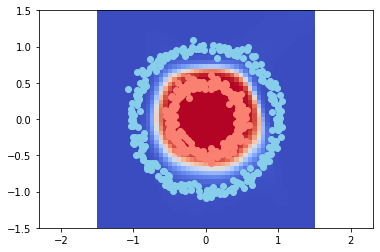

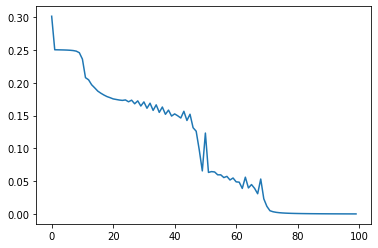

In [ ]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)
loss = []

for i in range(2500):

  #TRAIN NEURAL NETWORK

  pY = train(neural_n, X, Y, l2_cost, lr=0.05)

  if i % 25==0:

    loss.append(l2_cost[0](pY, Y))

  #Resolution
    res = 50 

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
      
    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]
    
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:, 0] == 0, 1], c = "skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:, 0] == 1, 1], c = "salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)


## **The error almost touches Zero**

With this, we can see how the Network has trained, making the Gradient advance and the Error is very close to Zero. Finding the combination of Parameter that separates the point cloud.

## Next Challenge

Try it with a different DataSet and in the form of a spiral, also try with a greater number of Classes.